#Pre-processamento do dataset

###Notebook de pré-processamento (colab):

https://colab.research.google.com/drive/1_BZZPeIJiUu-6qWBgnKe4ftQOGgesNZk


Dados brutos obtidos do Centro de apredizagem de máquina e sistema inteligentes - Universidade da Califórnia

https://archive.ics.uci.edu/ml/machine-learning-databases/movies-mld/data/main.html

#Importando dependências

In [ ]:
!pip install pydotplus
!pip install dtreeviz

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#Importação dos dados



In [4]:
dataset = pd.read_csv('https://drive.google.com/uc?export=download&id=165o96AULXo8eMZciKMTGyPxdDVFpXXrq')
dataset.head(3)

,diretor,produtor,genero,estudio
0,37,25,1,Shamley
1,3,58,1,Warners
2,34,2,1,Paramount


# Separando features/target e codificando target

In [ ]:
X = dataset.iloc[:,0:-1]
X.head(3)

,diretor,produtor,genero
0,37,25,1
1,3,58,1
2,34,2,1


In [ ]:
le = LabelEncoder()
y = pd.DataFrame(le.fit_transform(dataset['estudio']))
y.value_counts().sort_index()

0     7
1     3
2    13
3    27
4    12
5     9
6    30
7     5
8     4
9    13
dtype: int64

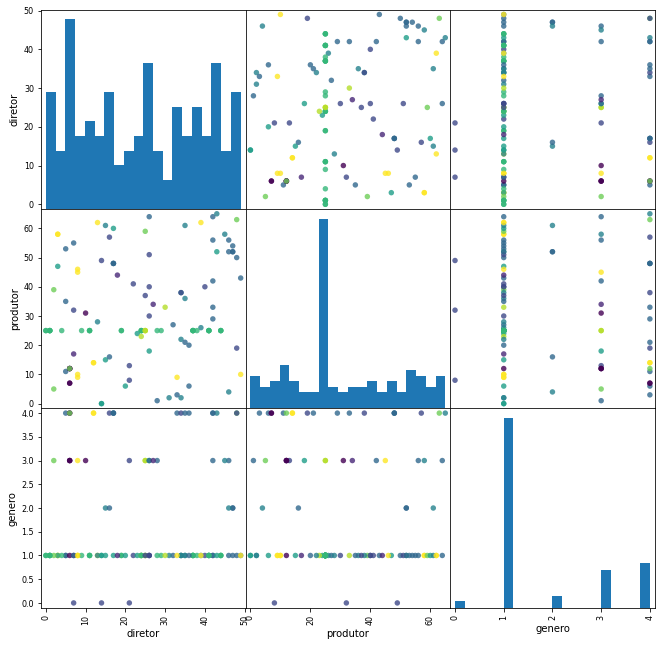

In [ ]:
ax2 = pd.plotting.scatter_matrix(X,figsize=(11,11),marker='o',c=y,s=30,alpha=.8,hist_kwds={'bins':20})

###Separando target e features em cada dataset (train e test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.20)

# Indução do Modelo
 




In [ ]:
demand_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
demand_tree = demand_tree.fit(X_train, y_train)
print("Acurácia (base de treinamento):", demand_tree.score(X_train, y_train))

Acurácia (base de treinamento): 1.0


In [ ]:
y_pred = demand_tree.predict(X_test)
print("Acurácia de previsão:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Acurácia de previsão: 0.32
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         2
           3       0.20      0.20      0.20         5
           4       0.25      0.50      0.33         2
           5       0.00      0.00      0.00         4
           6       0.71      1.00      0.83         5
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.50      0.33      0.40         3

    accuracy                           0.32        25
   macro avg       0.17      0.20      0.18        25
weighted avg       0.26      0.32      0.28        25



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


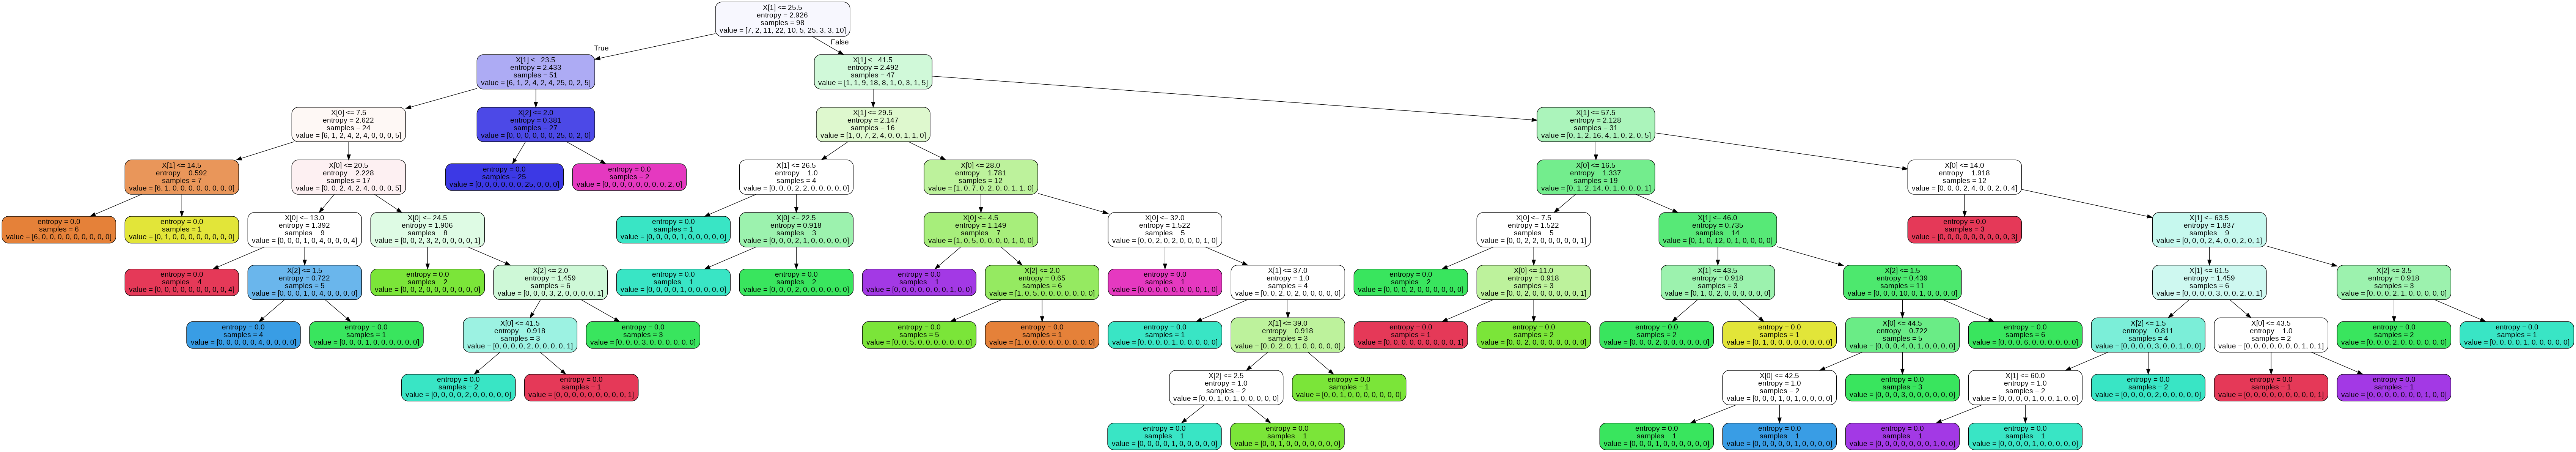

In [ ]:
import pydotplus 
from IPython.display import Image  
# Create DOT data
dot_data = tree.export_graphviz(demand_tree, out_file=None, 
                                proportion=False,
                                rounded =True,
                                filled=True
                                  
                                )

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
#graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

###Aumentando a acertividade

1.   Maior quantidade de features para reduzir o underfitting (high bias)
2.   Poucos dados de treinamento

###Proximo passos:

1.   Revisitar processos do negócio para tentar identificar mais features com relevância para o modelo
2.   Tentar obter mais dados em planilhas de controle das áreas
3.   Separar dados de cross validation e contruir gráficos de diagnótico para identificar/confirmar (bias e variância do modelo)